## 데이터 소개



Fashion MNIST는 다양한 **패션 아이템 이미지**가 포함된 데이터셋입니다.

### 데이터셋 특징

- **학습 데이터**: 6만 개
- **테스트 데이터**: 1만 개
- **이미지 크기**: 28×28 (그레이스케일)
- **클래스**: 총 10개 (각 클래스에 데이터 균등 분포)

### 클래스 정보

0번부터 9번까지 다음과 같은 패션 아이템으로 구성됩니다:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


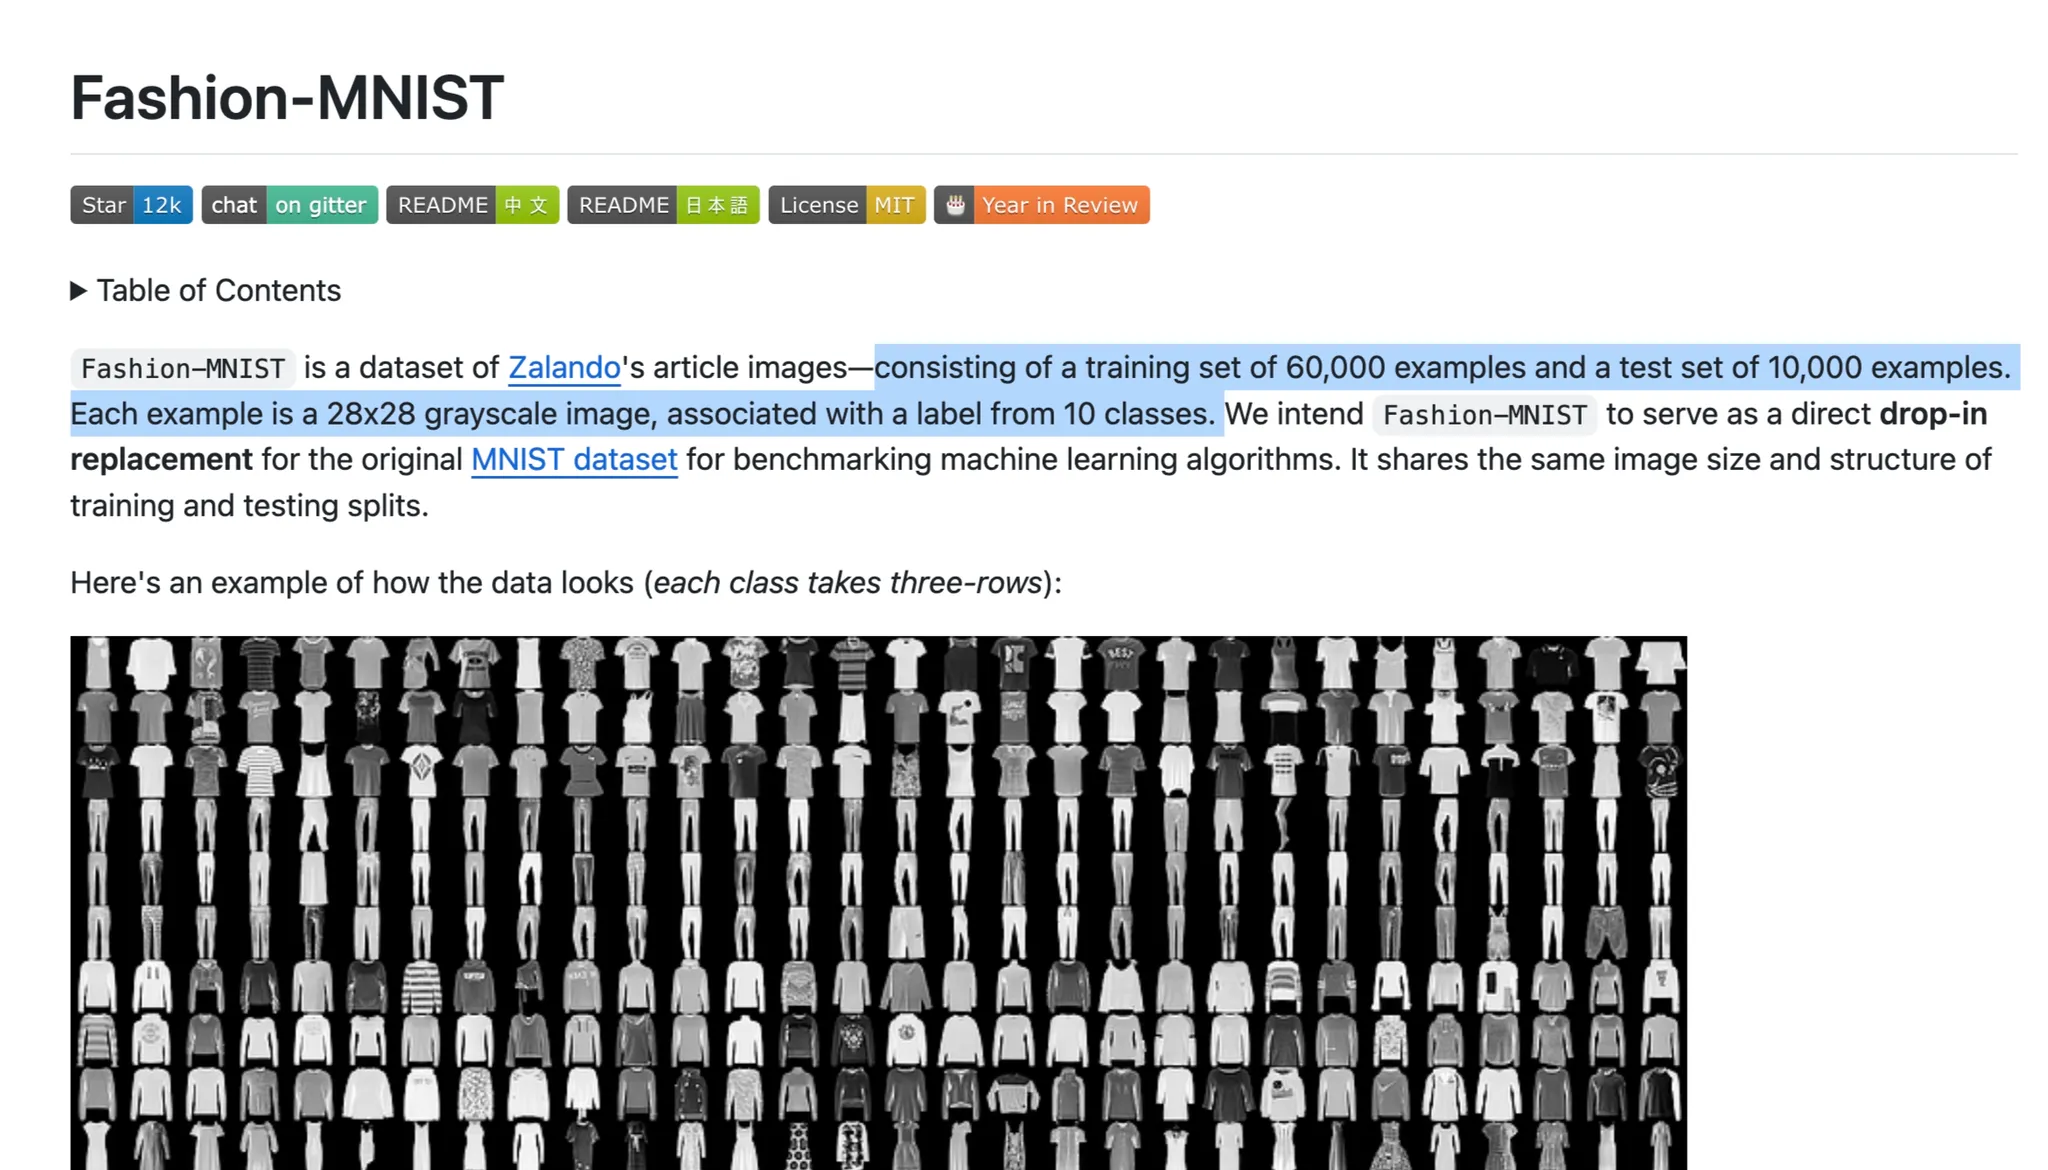

### 데이터 불러오기

PyTorch의 TorchVision 라이브러리

- **TorchVision**은 PyTorch에서 제공하는 **컴퓨터 비전용 라이브러리**입니다.
- 다양한 데이터셋, 모델, 이미지 전처리 및 증강 기능을 지원합니다.
- 이번 강의에서는 TorchVision의 **datasets** 모듈을 활용합니다.

In [1]:
import numpy as np

import torch
from torchvision import datasets

In [2]:
#학습 데이터
train_dataset = datasets.FashionMNIST(
    root='./content/fashion_mnist',
    train = True,
    download = True
)

In [3]:
#테스트 데이터
test_dataset = datasets.FashionMNIST(
    root='./content/fashion_mnist',
    train=False,
    download=True
)

In [4]:
print(f'학습 데이터 개수 {len(train_dataset)}')
print(f"테스트 데이터 개수 {len(test_dataset)}")

학습 데이터 개수 60000
테스트 데이터 개수 10000


In [5]:
data_item = train_dataset[0]
print(data_item)

(<PIL.Image.Image image mode=L size=28x28 at 0x19E4C3FAF50>, 9)


In [6]:
data_item[0]

In [7]:
#시각화
import matplotlib.pyplot as plt

def visualize_data(image, label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap='gray')
    plt.xlabel(class_names[label])
    plt.show()


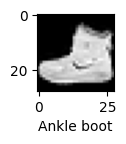

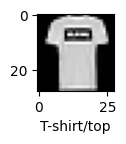

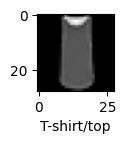

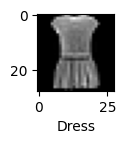

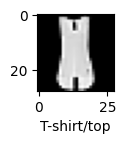

In [8]:
for i in range(5):
    image = train_dataset[i][0]
    label = train_dataset[i][1]
    visualize_data(image, label)

## 이미지 데이터 전처리하기

Fashion MNIST 데이터셋을 대상으로 전처리 과정을 진행하며, 텐서 변환, 스케일링, 표준화, 그리고 전처리를 데이터셋에 적용하는 방법을 살펴봅니다.

Fashion MNIST 데이터를 불러오면 이미지가 **Pillow(PIL)** 형식으로 제공됩니다.

하지만 PyTorch에서는 **텐서(Tensor)** 를 사용해야 하므로, PIL 이미지를 텐서로 변환해야 합니다.

In [9]:
image_pil = train_dataset[0][0]
type(image_pil)

PIL.Image.Image

In [10]:
#PIL image --> Tensor
from torchvision.transforms import v2

to_image = v2.ToImage()
image_tensor = to_image(image_pil)

print(type(image_pil))
print(type(image_tensor))

<class 'PIL.Image.Image'>
<class 'torchvision.tv_tensors._image.Image'>


In [11]:
display(image_tensor)

Image([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

- **결과 타입**: `torchvision.tv_tensors._image.Image`
- **크기**: 텐서의 첫 번째 차원은 채널 수(1, 그레이스케일).
- 변환 후에도 픽셀값은 0~255

### 데이터 타입 변환 및 스케일링

딥러닝 모델 학습을 위해 픽셀값을 **0~1 범위의 실수(float)** 로 변환해야 합니다.

In [12]:
to_dtype = v2.ToDtype(dtype=torch.float32, scale=True)
image_tensor_float = to_dtype(image_tensor)
# image_tensor_float

In [13]:
print(f'dtype {image_tensor_float.dtype}')
print(f'min {image_tensor_float.min()}')
print(f'max {image_tensor_float.max()}')

dtype torch.float32
min 0.0
max 1.0


In [14]:
# to_image = v2.ToImage()
# to_dtype = v2.ToDtype()

# tensor = to_image(image_pil)
# tensor = to_dtype(tensor)

In [15]:
#compose 적용
transforms = v2.Compose(
     [
         v2.ToImage(),
         v2.ToDtype(dtype=torch.float32, scale=True),
     ]
)

In [16]:
image_tensor_compose = transforms(image_pil)

print(f'type {type(image_tensor_compose)}')
print(f'dtype {image_tensor_compose.dtype}')
print(f'max {image_tensor_compose.max()}')
print(f'min {image_tensor_compose.min()}')

type <class 'torchvision.tv_tensors._image.Image'>
dtype torch.float32
max 1.0
min 0.0


In [17]:
train_dataset = datasets.FashionMNIST(
    root='./content/fashion_mnist',
    train=True,
    download=True,
    transform=transforms
)
test_dataset = datasets.FashionMNIST(
    root='./content/fashion_mnist',
    train=False,
    download=True,
    transform=transforms
)

In [18]:
image_transformed = train_dataset[0][0]

print(f'type {type(image_transformed)}')
print(f'dtype {image_transformed.dtype}')
print(f'max {image_transformed.max()}')
print(f'min {image_transformed.min()}')

type <class 'torchvision.tv_tensors._image.Image'>
dtype torch.float32
max 1.0
min 0.0


## 이미지 데이터 증강하기

데이터 증강은 학습 데이터를 변형하여 데이터 다양성을 높이고, 오버피팅 방지 및 모델 일반화 성능 향상을 목표로 합니다.

### 데이터 증강이란?

- 기존 학습 데이터를 변형하여 **데이터 양을 효과적으로 늘리는 방법**입니다.
- 이미지 데이터의 경우, 이미지 반전, 회전, 자르기, 밝기 조정 등 다양한 방식으로 증강할 수 있습니다.

### 데이터 증강의 효과

- 학습 데이터 다양성을 높여 **오버피팅 방지**.
- 모델의 **일반화 성능** 향상.

In [19]:
from PIL import Image
from torchvision.transforms import v2

import matplotlib.pyplot as plt
import torch

In [20]:
# # flower 데이터 다운로드
# !wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
# !tar -xvf ./flower_photos.tgz > /dev/null 2>&1

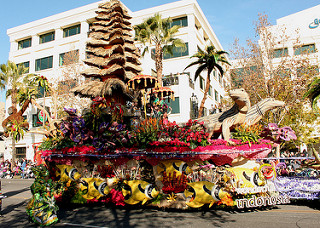

In [21]:
image_building = Image.open('./content/flower_photos/roses/11694025703_9a906fedc1_n.jpg')
image_building

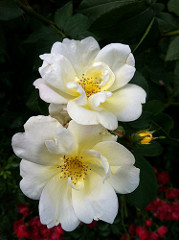

In [22]:
image_flower = Image.open('./content/flower_photos/roses/10090824183_d02c613f10_m.jpg')
image_flower

In [23]:
# 시각화 함수
def visualize(input_image, transform):
    fig, axes = plt.subplots(2,2, figsize=(6,6))
    
    axes = axes.flatten()
    for ax in axes:
        ax.imshow(transform(input_image))
        ax.axis('off')
    plt.show()

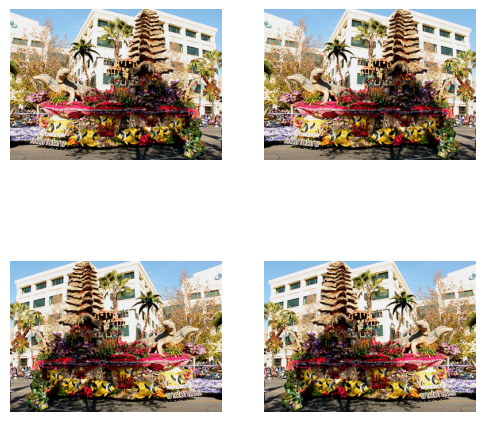

In [24]:
# 이미지 좌우 반전 (반전이 일어날 확률 p)
hor_flip = v2.RandomHorizontalFlip(p=0.5)
visualize(image_building, hor_flip)

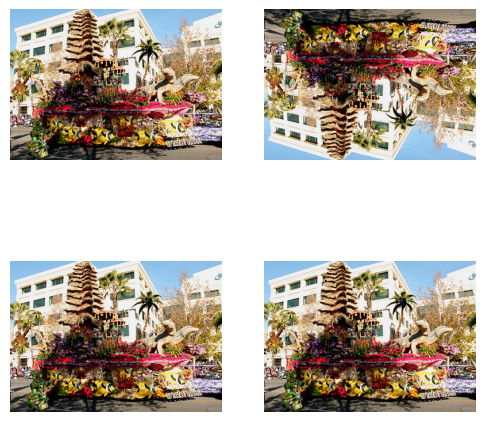

In [25]:
ver_flip = v2.RandomVerticalFlip(p=0.5)
visualize(image_building, ver_flip)

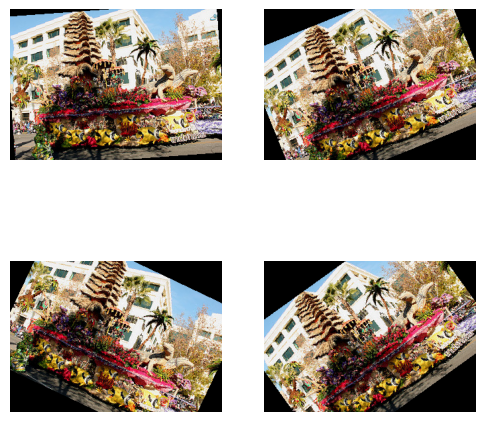

In [26]:
rot = v2.RandomRotation(degrees=45)
visualize(image_building, rot)

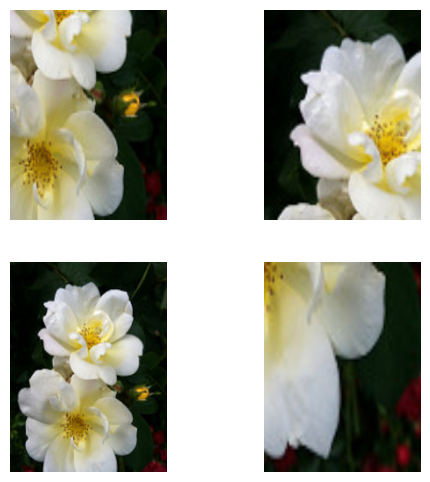

In [27]:
rrc = v2.RandomResizedCrop(size=(image_flower.size[1], image_flower.size[0]))
visualize(image_flower, rrc)

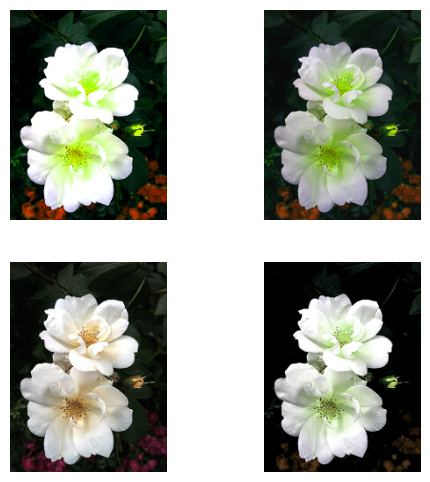

In [28]:
jitter = v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=2, hue=0.2)
visualize(image_flower, jitter)

- 이미지를 **색상, 밝기, 채도, 대비** 측면에서 변형.
    - `brightness`: 밝기 조정.
    - `contrast`: 대비 조정.
    - `saturation`: 채도 조정.
    - `hue`: 색상 조정.

#### Compose
TorchVision의 Compose 객체를 활용해 여러 전처리 및 증강 기법을 결합할 수 있습니다.

In [29]:
transforms_train = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size=20),
        v2.RandomRotation(degrees=10),
        v2.ToDtype(dtype=torch.float32, scale=True),
        v2.Normalize(mean=[0.286], std=[0.353])
    ]
)

In [30]:
transforms_test = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
        v2.Normalize(mean=[0.286], std=[0.353])
    ]
)

In [31]:
from torchvision import datasets

train_dataset = datasets.FashionMNIST(
    root='./content/fashion_mnist',
    train=True,
    download=True,
    transform=transforms_train
)
test_dataset = datasets.FashionMNIST(
    root='./content/fashion_mnist',
    train=False,
    download=True,
    transform=transforms_test
)

#### 주의사항

- **학습 데이터**: 증강 및 전처리 적용.
- **테스트 데이터**: 증강 없이 전처리만 적용.

In [32]:
#@title 데이터 로드
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 데이터셋 로드 및 전처리
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))]  # [-1, 1]
)

train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)
test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, drop_last=False)

# device 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('using device : ', device)

using device :  cuda


In [33]:
#@title DNN 모델 정의
class DNNModel(nn.Module):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)  # 출력 -> CrossEntropyLoss가 내부에서 softmax 적용하기 때문에 출력함수가 없음
        return x

In [34]:
#@title 모델, 손실함수, 옵티마이저 설정
model = DNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [35]:
#@title Train Func
def train_model(model, dataloader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        train_loss = 0
        correct = 0
        total = 0
        
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss = loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
        train_loss /= len(dataloader.dataset)
        acc = correct / total
        print(f'Epoch {epoch+1}/{epochs}, Loss : {train_loss:.4f}, Accuracy : {acc:.4f}')
    return train_loss, acc

In [36]:
# @title Test Func
def test_model(model, dataloader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0 
    with  torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    
    test_loss /= len(dataloader.dataset)
    acc = correct / total
    print(f'Test Loss : {test_loss:.4f}, Accuracy : {acc:.4f}')
    return test_loss, acc

In [37]:
epochs = 20
train_model(model, train_dataloader, criterion, optimizer, epochs)
test_model(model, test_dataloader, criterion)

Epoch 1/20, Loss : 0.0003, Accuracy : 0.8118
Epoch 2/20, Loss : 0.0005, Accuracy : 0.8638
Epoch 3/20, Loss : 0.0003, Accuracy : 0.8774
Epoch 4/20, Loss : 0.0004, Accuracy : 0.8858
Epoch 5/20, Loss : 0.0003, Accuracy : 0.8931
Epoch 6/20, Loss : 0.0005, Accuracy : 0.8993
Epoch 7/20, Loss : 0.0004, Accuracy : 0.9032
Epoch 8/20, Loss : 0.0002, Accuracy : 0.9079
Epoch 9/20, Loss : 0.0002, Accuracy : 0.9138
Epoch 10/20, Loss : 0.0003, Accuracy : 0.9171
Epoch 11/20, Loss : 0.0003, Accuracy : 0.9210
Epoch 12/20, Loss : 0.0002, Accuracy : 0.9245
Epoch 13/20, Loss : 0.0002, Accuracy : 0.9272
Epoch 14/20, Loss : 0.0002, Accuracy : 0.9313
Epoch 15/20, Loss : 0.0003, Accuracy : 0.9347
Epoch 16/20, Loss : 0.0002, Accuracy : 0.9371
Epoch 17/20, Loss : 0.0002, Accuracy : 0.9393
Epoch 18/20, Loss : 0.0001, Accuracy : 0.9432
Epoch 19/20, Loss : 0.0001, Accuracy : 0.9445
Epoch 20/20, Loss : 0.0001, Accuracy : 0.9472
Test Loss : 0.4326, Accuracy : 0.8851


(0.4325538206860423, 0.8851)

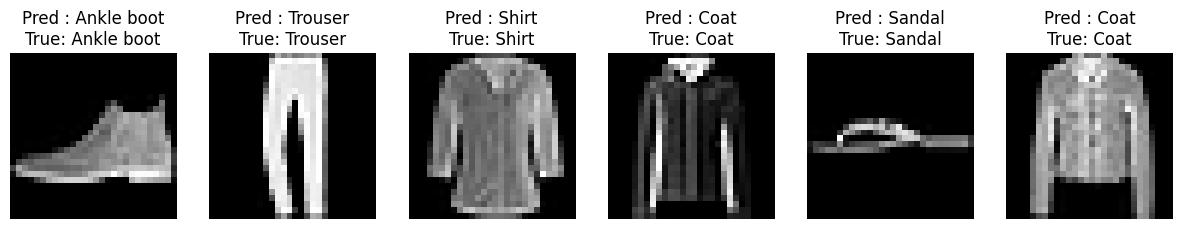

In [38]:
#@title 결과 시각화
def visualize_predictions(model, dataloader, classes):
    model.eval()
    inputs, labels = next(iter(dataloader))
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

    inputs = inputs.cpu()
    preds = preds.cpu()
    labels = labels.cpu()

    fig, axes = plt.subplots(1,6, figsize=(15,5))
    for i in range(6):
        axes[i].imshow(inputs[2*i].squeeze(), cmap='gray')
        axes[i].set_title(f"Pred : {classes[preds[2*i]]}\nTrue: {classes[labels[2*i]]}")
        axes[i].axis('off')
    plt.show()

# 클래스 이름
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

visualize_predictions(model, test_dataloader, classes)

##  CNN 모델에 사용되는 레이어

### `Conv2d`

##### 기본 설정

```python
conv_layer = nn.Conv2d(
    in_channels=3,  # 입력 채널 수 (예: RGB 이미지면 3)
    out_channels=32,  # 출력 채널 수 (필터 개수)
    kernel_size=3,  # 커널 크기 (3x3 필터)
    stride=1,  # 필터 이동 간격
    padding=0,  # 입력 가장자리 패딩 크기
)

```

##### 주요 파라미터

- **`in_channels`**: 입력 데이터의 채널 수.
- **`out_channels`**: 출력 데이터의 채널 수 = 필터 개수.
- **`kernel_size`**: 필터 크기. (정수 → 정사각형, 튜플 → 직사각형 가능)
- **`stride`**: 필터 이동 간격. (기본값: 1)
- **`padding`**: 입력 가장자리를 채워 크기를 조정.
    - 0: 패딩 없음 (`valid`),
    - 1: 출력 크기 = 입력 크기 (`same`은 스트라이드 1에서만 적용 가능).

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

conv_layer = nn.Conv2d(3,32, kernel_size=3, stride=1, padding=1)

In [40]:
# 입력 데이터
x = torch.randn(2,3,28,28)  # batch:2, channel:3, height:28, width:28
y = conv_layer(x)

print(y.size())

torch.Size([2, 32, 28, 28])


##### 출력 형태

- 배치 크기: 동일 (2)
- 채널 수: `out_channels` (32)
- 높이와 너비: 필터 크기, 패딩, 스트라이드에 따라 변화.

### Pooling Layer

풀링 레이어는 데이터를 **다운샘플링**하여 크기를 줄이고, 중요한 정보를 추출합니다.

주요 방식:

- **맥스 풀링(Max Pooling)**: 윈도우 내 최댓값 선택.
- **애버리지 풀링(Average Pooling)**: 윈도우 내 평균값 선택.

##### 1) `MaxPool2d` 클래스를 이용한 맥스 풀링 레이어 생성

##### 기본 설정

```python
maxpool_layer = nn.MaxPool2d(
    kernel_size=2,  # 풀링 윈도우 크기 (2x2)
    stride=2,  # 이동 간격 (기본값: 커널 크기)
    padding=0,  # 패딩 크기
)

```

##### 주요 파라미터

- **`kernel_size`**: 풀링 윈도우 크기.
- **`stride`**: 윈도우 이동 간격.
- **`padding`**: 가장자리 패딩 크기.

In [41]:
maxpool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

In [42]:
x = torch.randn(2,3,28,28)
y = maxpool_layer(x)

print(y.size())

torch.Size([2, 3, 14, 14])


- 배치 크기와 채널 수: 동일.
- 높이와 너비: `kernel_size`와 `stride`에 따라 축소.

풀링 레이어는 파라미터가 필요하지 않기 때문에, torch.nn.functional API를 직접 사용하는 것도 가능합니다.

In [43]:
import torch.nn.functional as F

y = F.max_pool2d(x, kernel_size=2)
print(y.size()) 
print(x[0,0,:2,:2])
print(y[0,0,0,0])

torch.Size([2, 3, 14, 14])
tensor([[ 0.8363, -2.1142],
        [-1.7667,  1.9003]])
tensor(1.9003)


In [44]:
avgpool_layer = nn.AvgPool2d(kernel_size=2, stride=2)

In [45]:
x = torch.randn(2,3,28,28)
y = avgpool_layer(x)

print(y.size())
print(x[0,0,:2,:2])
print(y[0,0,0,0])

torch.Size([2, 3, 14, 14])
tensor([[ 0.7107,  1.7499],
        [-0.4942,  2.3341]])
tensor(1.0751)


## CNN 모델 만들기

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.maxpool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(64*7*7, 64)
        self.linear2 = nn.Linear(64, 10)
    
    def forward(self, x):           # C x H x W
        x = F.relu(self.conv1(x))   # 1 x 28 x 28 -> 32 x 28 x 28
        x = self.maxpool(x)         # 32 x 28 x 28 -> 32 x 14 x 14
        x = F.relu(self.conv2(x))   # 32 x 14 x 14 -> 64 x 14 x 14
        x = self.maxpool(x)         # 64 x 14 x 14 -> 64 x 7 x 7
        
        x = self.flatten(x)         # 64 x 7 x 7 -> (64*7*7 = 3136)
        x = F.relu(self.linear1(x))# (64*7*7 = 3136) -> (64)
        output = self.linear2(x)    # (64) -> (10) : class 수
        
        return output

In [47]:
model = CNNModel()
x = torch.randn(2,1,28,28)
output = model(x)

print(output.size())
print(output)

torch.Size([2, 10])
tensor([[-0.0233, -0.0673,  0.0160,  0.0223, -0.0626, -0.0744, -0.1767,  0.0854,
         -0.1433, -0.0223],
        [ 0.0076, -0.0697, -0.0023, -0.0040, -0.1002, -0.1248, -0.1896,  0.0946,
         -0.1639, -0.0758]], grad_fn=<AddmmBackward0>)


In [48]:
# !pip install torchinfo

In [49]:
from torchinfo import summary
summary(model, input_size=(2,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [2, 10]                   --
├─Conv2d: 1-1                            [2, 32, 28, 28]           320
├─MaxPool2d: 1-2                         [2, 32, 14, 14]           --
├─Conv2d: 1-3                            [2, 64, 14, 14]           18,496
├─MaxPool2d: 1-4                         [2, 64, 7, 7]             --
├─Flatten: 1-5                           [2, 3136]                 --
├─Linear: 1-6                            [2, 64]                   200,768
├─Linear: 1-7                            [2, 10]                   650
Total params: 220,234
Trainable params: 220,234
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 8.16
Input size (MB): 0.01
Forward/backward pass size (MB): 0.60
Params size (MB): 0.88
Estimated Total Size (MB): 1.49

##### 주요 파라미터

- **`nn.Conv2d`**
    - `in_channels`: 입력 채널 수 (예: 1 → 그레이스케일 이미지).
    - `out_channels`: 출력 채널 수 (필터 개수).
    - `kernel_size`: 필터 크기.
    - `stride`: 필터 이동 간격.
    - `padding`: 가장자리 패딩 크기.
- **`nn.MaxPool2d`**
    - `kernel_size`: 풀링 윈도우 크기.
    - `stride`: 풀링 윈도우 이동 간격.
- **`nn.Linear`**
    - `in_features`: 입력 차원.
    - `out_features`: 출력 차원.

##### 모델의 특징 요약

1. 두 개의 **컨볼루셔널 레이어**와 **맥스풀링 레이어**를 사용.
2. 중간에 **드롭아웃 레이어**로 오버피팅 방지.
3. 최종적으로 **Flatten**과 **리니어 레이어**로 10개의 클래스를 예측.

## 모델 학습시키기

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision.transforms import v2
from torchvision import datasets

import matplotlib.pyplot as plt
from PIL import Image

In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [52]:
transforms_train = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size=28),
        v2.RandomRotation(degrees=10),
        v2.ToDtype(dtype=torch.float32, scale=True),
        v2.Normalize(mean=[0.286], std=[0.353]),
    ]
)

transforms_test = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype=torch.float32, scale=True),
        v2.Normalize(mean=[0.286], std=[0.353]),
    ]
)

In [53]:
train_dataset = datasets.FashionMNIST(
    root = './content/fashion_mnist',
    train=True,
    download=True,
    transform=transforms_train
)
test_dataset = datasets.FashionMNIST(
    root = './content/fashion_mnist',
    train=False,
    download=True,
    transform=transforms_test
)

In [54]:
# 검증데이터 분할하기
# 검증 데이터를 만들기 위해 테스트 데이터셋을 랜덤하게 분할합니다.
# 검증 데이터는 이미지 증강이 포함되지 않은 데이터에서 분할하는 것이 좋습니다.

from torch.utils.data import random_split

print(len(test_dataset))
val_dataset, test_dataset = random_split(test_dataset,[5000,5000])

print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

10000
60000
5000
5000


In [55]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=128,
                              shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=32)
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [56]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 3,1,1)
        self.conv2 = nn.Conv2d(64, 128, 3,1,1)

        self.maxpool = nn.MaxPool2d(2,2)
        self.flatten = nn.Flatten()

        self.linear1 = nn.Linear(7*7*128, 128)
        self.linear2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)

        x = self.flatten(x)

        x = F.relu(self.linear1(x))
        output = self.linear2(x)

        return output

model = CNNModel().to(device)

In [57]:
summary(model, input_size=(1,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [1, 10]                   --
├─Conv2d: 1-1                            [1, 64, 28, 28]           640
├─MaxPool2d: 1-2                         [1, 64, 14, 14]           --
├─Conv2d: 1-3                            [1, 128, 14, 14]          73,856
├─MaxPool2d: 1-4                         [1, 128, 7, 7]            --
├─Flatten: 1-5                           [1, 6272]                 --
├─Linear: 1-6                            [1, 128]                  802,944
├─Linear: 1-7                            [1, 10]                   1,290
Total params: 878,730
Trainable params: 878,730
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 15.78
Input size (MB): 0.00
Forward/backward pass size (MB): 0.60
Params size (MB): 3.51
Estimated Total Size (MB): 4.12

In [58]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [59]:
#@title 평가 함수

def evaluate(model, dataloader, loss_fn):
    model.eval()
    losses=[]
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)

            preds = model(inputs)

            loss = loss_fn(preds, labels)
            losses.append(loss.item())

            pred_labels = torch.argmax(preds, dim=1)
            correct += (pred_labels == labels).sum().item()
            total += len(preds)

    avg_loss = sum(losses) / len(losses)
    acc = correct / total

    return avg_loss, acc

In [60]:
#@title 학습 루프

epochs = 10
step=0
for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
        optimizer.zero_grad()

        inputs = batch[0].to(device)
        labels = batch[1].to(device)

        preds = model(inputs)
        loss = loss_fn(preds, labels)

        loss.backward()
        optimizer.step()

        step +=1
        if step % 100 ==0:
            print(f"step {step}, train_loss {loss.item():.4f}")

    val_loss, val_acc = evaluate(model, val_dataloader, loss_fn)
    print(f"epoch {epoch+1}/{epochs}, val_loss {val_loss:.4f}, val_acc {val_acc:.4f}")
print('Training finished')

step 100, train_loss 1.3457
step 200, train_loss 1.0489
step 300, train_loss 1.1004
step 400, train_loss 0.9539
epoch 1/10, val_loss 0.4962, val_acc 0.8102
step 500, train_loss 0.8816
step 600, train_loss 0.9454
step 700, train_loss 0.9416
step 800, train_loss 0.7970
step 900, train_loss 0.7947
epoch 2/10, val_loss 0.4191, val_acc 0.8432
step 1000, train_loss 0.9720
step 1100, train_loss 0.7018
step 1200, train_loss 0.9226
step 1300, train_loss 0.7225
step 1400, train_loss 0.6394
epoch 3/10, val_loss 0.4022, val_acc 0.8542
step 1500, train_loss 0.8039
step 1600, train_loss 0.7101
step 1700, train_loss 0.8044
step 1800, train_loss 0.7436
epoch 4/10, val_loss 0.3564, val_acc 0.8688
step 1900, train_loss 0.6925
step 2000, train_loss 0.7555
step 2100, train_loss 0.6308
step 2200, train_loss 0.6572
step 2300, train_loss 0.7683
epoch 5/10, val_loss 0.3341, val_acc 0.8788
step 2400, train_loss 0.7523
step 2500, train_loss 0.6623
step 2600, train_loss 0.7063
step 2700, train_loss 0.6703
step 2

In [61]:
#@title 테스트 데이터 평가
test_loss, test_acc = evaluate(model, test_dataloader, loss_fn)
print(f'Test Accuracy : {test_acc:.4f}')

Test Accuracy : 0.8870


In [62]:
model = model.to(device)
input_data = next(iter(train_dataloader))[0]
print(input_data.shape)

summary(model, input_data=input_data, device=device)

torch.Size([128, 1, 28, 28])


Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [128, 10]                 --
├─Conv2d: 1-1                            [128, 64, 28, 28]         640
├─MaxPool2d: 1-2                         [128, 64, 14, 14]         --
├─Conv2d: 1-3                            [128, 128, 14, 14]        73,856
├─MaxPool2d: 1-4                         [128, 128, 7, 7]          --
├─Flatten: 1-5                           [128, 6272]               --
├─Linear: 1-6                            [128, 128]                802,944
├─Linear: 1-7                            [128, 10]                 1,290
Total params: 878,730
Trainable params: 878,730
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 2.02
Input size (MB): 0.40
Forward/backward pass size (MB): 77.21
Params size (MB): 3.51
Estimated Total Size (MB): 81.13

# 참고자료

#### (참고) ImageFolder

In [ ]:
# !wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
# !tar -xvf ./flower_photos.tgz > /dev/null 2>&1

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
������ ��θ� ã�� �� �����ϴ�.


In [65]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

# 1. 데이터 증강 및 전처리 정의
# 훈련 데이터 전용: 증강 포함
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # 랜덤 좌우 반전
    transforms.RandomRotation(30),          # 랜덤 회전 (-30도 ~ 30도)
    transforms.RandomResizedCrop(224),      # 랜덤 자르기 후 크기 조정
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # 밝기/대비/채도 조정
    transforms.ToTensor(),                  # 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])    # 정규화
])

# 검증 및 테스트 데이터 전용: 증강 없음
transform_test = transforms.Compose([
    transforms.Resize(256),                 # 크기 조정
    transforms.CenterCrop(224),             # 중앙 자르기
    transforms.ToTensor(),                  # 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])    # 정규화
])

# 2. 데이터셋 로드
original_dataset = datasets.ImageFolder(root="./content/flower_photos")

# 3. 데이터셋 인덱스 추출 및 분할
indices = list(range(len(original_dataset)))
train_indices, temp_indices = train_test_split(indices, test_size=0.3, random_state=42)  # 70% 훈련, 30% 나머지
val_indices, test_indices = train_test_split(temp_indices, test_size=0.33, random_state=42)  # 나머지 30% -> 20% 검증, 10% 테스트

# 4. Subset을 통해 데이터셋 분리
train_dataset = Subset(original_dataset, train_indices)
val_dataset = Subset(original_dataset, val_indices)
test_dataset = Subset(original_dataset, test_indices)

# 5. 각각의 데이터셋에 변환(증강/정규화) 적용
# Subset을 래핑하여 transform 적용
class TransformedDataset(Subset):
    def __init__(self, subset, transform):
        super().__init__(subset.dataset, subset.indices)
        self.transform = transform

    def __getitem__(self, index):
        image, label = super().__getitem__(index)
        if self.transform:
            image = self.transform(image)
        return image, label

train_dataset = TransformedDataset(train_dataset, transform_train)  # 증강 적용
val_dataset = TransformedDataset(val_dataset, transform_test)      # 정규화만 적용
test_dataset = TransformedDataset(test_dataset, transform_test)    # 정규화만 적용

# 6. DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# 클래스 이름 확인
print(f"Classes: {original_dataset.classes}")
print(f"Train Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")
print(f"Test Dataset Size: {len(test_dataset)}")

Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Train Dataset Size: 2569
Validation Dataset Size: 737
Test Dataset Size: 364


데이터 증강이 **훈련 데이터에만 적용**되고, **검증 및 테스트 데이터는 증강 없이 정규화만 적용**되어야 하는 경우를 반영하여 코드를 작성했습니다. 이 코드에서는 `torch.utils.data.Subset`을 사용하여 데이터셋을 분리하면서, 훈련 데이터에는 증강을 적용하고, 검증 및 테스트 데이터에는 전처리만 적용합니다.

---

##### 코드 설명

1. **데이터 증강 적용**:
   - 훈련 데이터에만 `transform_train`으로 정의된 증강(좌우 반전, 회전, 크기 조정 등)을 적용합니다.
   - 검증 및 테스트 데이터에는 `transform_test`로 정규화만 적용.

2. **Subset과 `TransformedDataset`**:
   - `Subset`을 사용해 데이터셋을 분리한 후, 각각의 데이터셋에 다른 `transform`을 적용합니다.
   - `TransformedDataset` 클래스는 `Subset`을 래핑하여 각 데이터셋에 다른 변환을 쉽게 적용할 수 있도록 합니다.

3. **데이터셋 분할**:
   - `train_test_split`으로 데이터를 70:20:10 비율로 분할.
   - 훈련 데이터, 검증 데이터, 테스트 데이터는 별도의 `Subset`으로 관리.

4. **DataLoader**:
   - 각 데이터셋에 대해 `DataLoader`를 생성하여 배치 단위로 데이터를 로드.

---

##### 출력 예시

1. 클래스 이름 확인:
   ```plaintext
   Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
   ```

2. 데이터 크기:
   ```plaintext
   Train Dataset Size: 2450
   Validation Dataset Size: 700
   Test Dataset Size: 350
   ```

---

##### 장점

1. **파일 이동 없음**:
   - 원본 데이터 구조를 변경하지 않고도 데이터셋을 나눌 수 있습니다.

2. **유연한 증강**:
   - 각 데이터셋에 서로 다른 변환(훈련 데이터에 증강, 검증/테스트 데이터에 정규화)을 적용할 수 있습니다.

3. **반복 실험 용이**:
   - 데이터 분할이 인덱스 기반이므로 실험마다 데이터셋을 재생성하거나 변경할 필요가 없습니다.

---